In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv', parse_dates = [ 'timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
#데이터의 타입과 구조

print('데이터의 구조는:', df.shape)
print('데이터의 타입은:', df.dtypes)
print('데이터의 칼럼은:', df.columns)

데이터의 구조는: (17414, 10)
데이터의 타입은: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 칼럼은: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [6]:
df.isna().sum()
#전부 0 => 결측치 없음

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

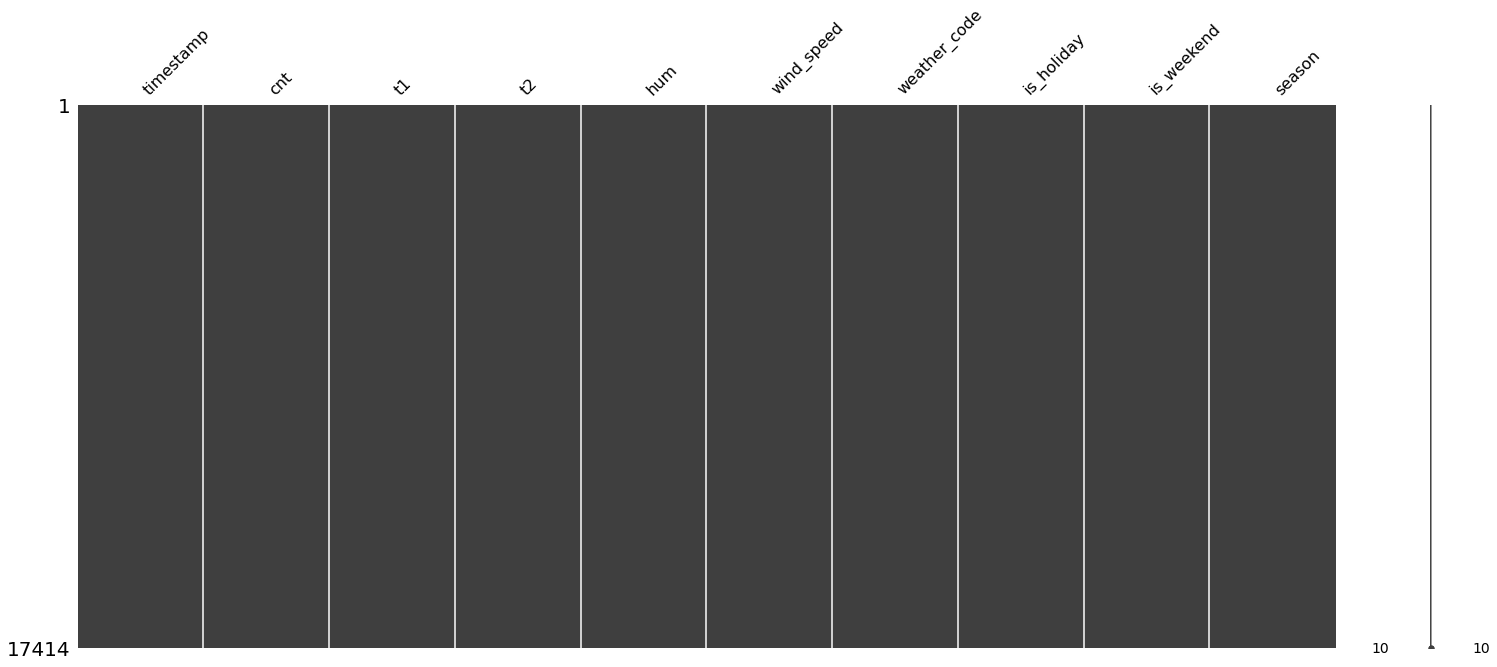

In [7]:
msno.matrix(df)
plt.show()

#결측치가 있다면 하얀색 그래프가 그려진다. 여기서는 결측치가 없어서 그냥 검은 바탕만 보임.

In [8]:
df['year'] = df['timestamp'].dt.year  #timestamp열에서 년을 추출한뒤, df에 'year' 컬럼을 만들어 그곳에 넣겠다.
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [9]:
#탐색적 분석 
df['year'].value_counts()  # year열의 구성이 어떻게 되어있는지 알아보자!
#df['month'].value_counts()
#df['dayofweek'].value_counts()
#df['hour'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='cnt'>

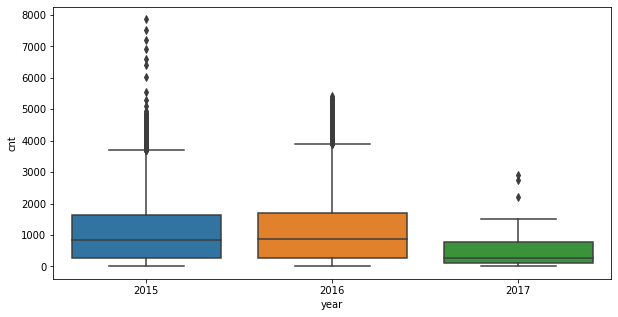

In [10]:
 #그래프를 통한 탐색적 분석
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['year'], df['cnt']) #boxplot, y축, x축 순서대로 입력

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='cnt'>

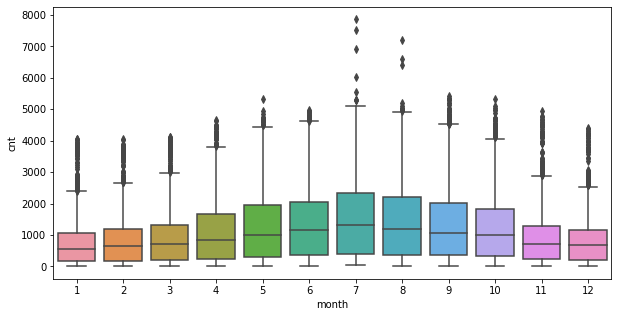

In [11]:
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['month'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

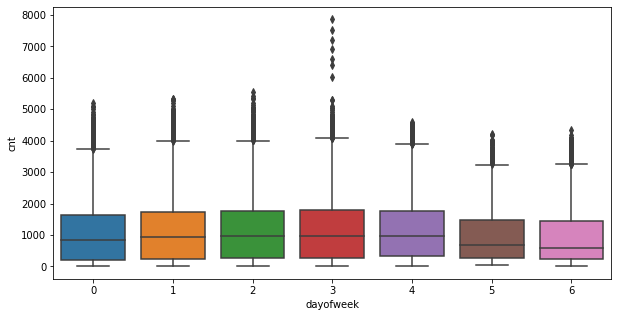

In [12]:
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['dayofweek'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='cnt'>

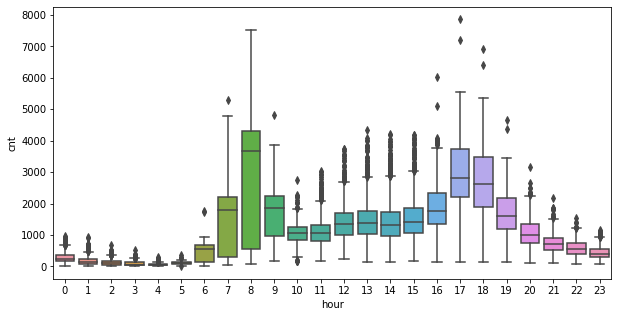

In [13]:
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['hour'], df['cnt'])

In [14]:
#그래프 함수 만들기(명령어= def)
def plot_bar(data, feature) :
    fig = plt.figure(figsize =(12,3))
    sns.barplot(x=feature, y='cnt', data = data, palette = 'Set3', orient='v')

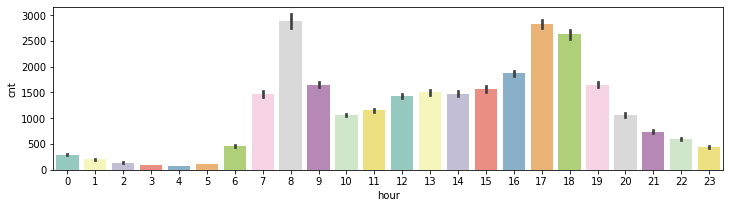

In [15]:
plot_bar(df, 'hour')

In [16]:
#아웃라이어 제거(함수만들기): 시그마 방법과 boxplot을 이용한 방법 2개가 가장 유명. 현재는 시그마 방법을 이용하는 것
def is_outlier(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between( lower_limit,  upper_limit)

In [17]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outlier)]
print('이상치 제거 전:', df.shape)
print('이상치 제거 후:', df_out.shape)

이상치 제거 전: (17414, 14)
이상치 제거 후: (17265, 14)


In [18]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [19]:
#데이터 변수를 카테고리형으로 변환
df_out['weather_code'] = df_out['weather_code'].astype('category')  #df_out의'weather_code'를 카테고리형으로 변환 뒤 다시 df_out의'weather_code'에 저장
df_out['season'] = df_out['season'].astype('category')
df_out['year '] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                     int64
month                 category
dayofweek                int64
hour                  category
year                  category
dtype: object

In [21]:
#dummy처리(데이터값들을 이진수들로 바꿔준다)
df_out = pd.get_dummies(df_out, columns=['weather_code','season', 'year','month','hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,2015,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,2015,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,2015,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,2015,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,2015,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_out.shape

(17265, 60)

In [23]:
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp', 'cnt'], axis=1)
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,year,weather_code_1.0,weather_code_2.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,2015,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#train set, test set 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=60, test_size=0.3, shuffle=False)

In [25]:
print('x_train의 구조는:', x_train.shape)
print('y_train의 구조는:', y_train.shape)

print('x_test의 구조는:', x_test.shape)
print('y_test의 구조는:', y_test.shape)

x_train의 구조는: (12085, 58)
y_train의 구조는: (12085,)
x_test의 구조는: (5180, 58)
y_test의 구조는: (5180,)


In [26]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [27]:
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=58))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               9440      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 20,341
Trainable params: 20,341
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='min')#과적합이 될때 loss를 기준으로 5번 이상 넘어가면 멈춰달라
history = model.fit(x_train, y_train, epochs=10, batch_size=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
10876/10876 [==============================] - 17s 2ms/step - loss: 714.4564 - mae: 714.4564 - val_loss: 617.6505 - val_mae: 617.6505
Epoch 2/10
10876/10876 [==============================] - 15s 1ms/step - loss: 582.1494 - mae: 582.1494 - val_loss: 587.8375 - val_mae: 587.8375
Epoch 3/10
10876/10876 [==============================] - 16s 1ms/step - loss: 525.7652 - mae: 525.7652 - val_loss: 559.7628 - val_mae: 559.7628
Epoch 4/10
10876/10876 [==============================] - 15s 1ms/step - loss: 495.9610 - mae: 495.9610 - val_loss: 518.0552 - val_mae: 518.0552
Epoch 5/10
10876/10876 [==============================] - 15s 1ms/step - loss: 463.8050 - mae: 463.8050 - val_loss: 459.3682 - val_mae: 459.3682
Epoch 6/10
10876/10876 [==============================] - 16s 1ms/step - loss: 421.7907 - mae: 421.7907 - val_loss: 713.0521 - val_mae: 713.0521
Epoch 7/10
10876/10876 [==============================] - 16s 1ms/step - loss: 415.1760 - mae: 415.1760 - val_loss: 423.9323 - val

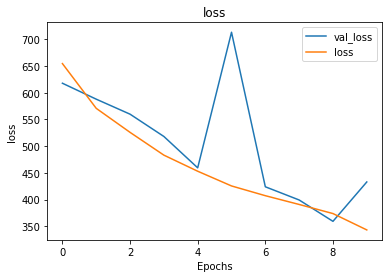

In [30]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss', 'loss'])
plt.show()

In [32]:
 y_predict = model.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('RMSE', RMSE(y_test, y_predict))

RMSE 754.375848247046


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =100, random_state=16) #100개의 모형, 
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)
print('RMSE', RMSE(y_test, rf_result))

RMSE 303.4704659063132


In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100,  random_state=16)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)
print('RMSE', RMSE(y_test, xgb_result))

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.year 

In [37]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100,  random_state=16)
lgb.fit(x_train, y_train)
lgb_result = lgb.predict(x_test)
print('RMSE', RMSE(y_test, lgb_result))

RMSE 323.2746495922864


In [44]:
#xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result)
dnn = pd.DataFrame(y_predict)
lgb = pd.DataFrame(lgb_result)
compare = pd.DataFrame(y_test).reset_index(drop=True)

In [45]:
#compare['xgb'] = xgb
compare['rf'] = rf
compare['dnn'] = dnn
compare['lgb'] = lgb
compare.head()

,cnt,rf,dnn,lgb
0,1885,1746.49,1215.186646,1830.345197
1,2175,1809.26,1440.192749,2133.296789
2,2485,2265.67,1580.829712,2590.899050
3,2882,2236.34,1652.399048,2613.783086
4,2965,2330.19,1902.483643,2306.341169


<AxesSubplot:xlabel='cnt', ylabel='Density'>

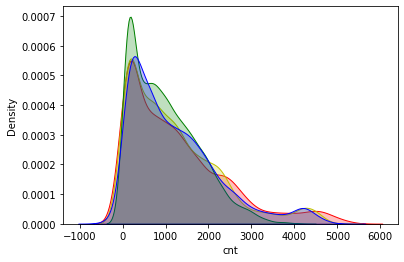

In [46]:
sns.kdeplot(compare['cnt'], shade=True, color='r')
#sns.kdeplot(compare['xgb'], shade=True, color='b')
sns.kdeplot(compare['rf'], shade=True, color='y')
sns.kdeplot(compare['dnn'], shade=True, color='g')
sns.kdeplot(compare['lgb'], shade=True, color='b')